<a href="https://colab.research.google.com/github/NroyAnalyst/NRinternship-2k25-sharda-dec/blob/main/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('/content/Superstore.csv', encoding='latin1')
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [14]:
df=df.dropna()
df=df.drop_duplicates()

In [15]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10,5)

In [17]:
#covert order date to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


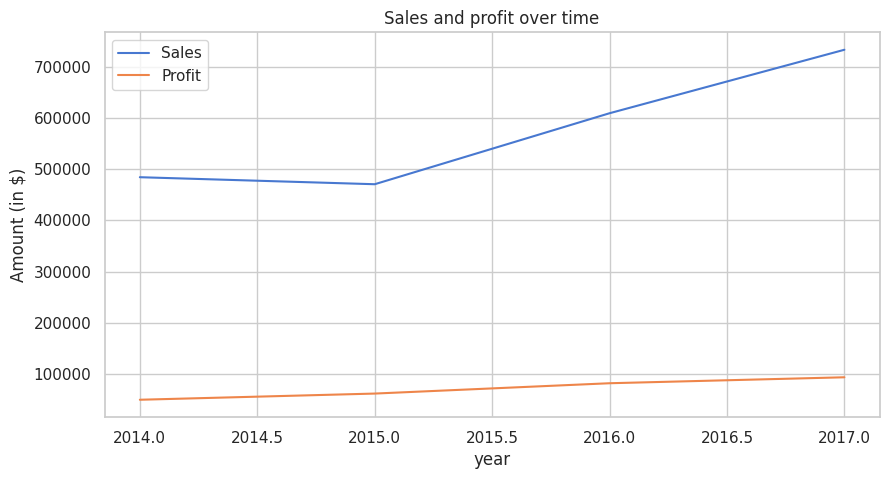

In [20]:
sales_trend =df.groupby(df["Order Date"].dt.year)[["Sales","Profit"]].sum().reset_index()
plt.plot(sales_trend["Order Date"], sales_trend["Sales"], label="Sales")
plt.plot(sales_trend["Order Date"], sales_trend["Profit"], label="Profit")

plt.title("Sales and profit over time")
plt.xlabel("year")
plt.ylabel("Amount (in $)")
plt.legend()
plt.show()

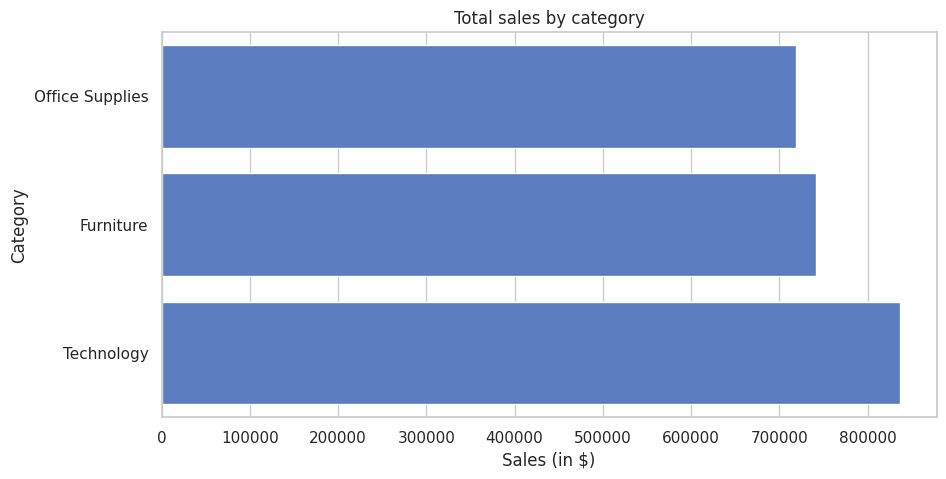

In [21]:
#sales by category (Bar Chart)
category_sales = df.groupby("Category")["Sales"].sum().sort_values()

sns.barplot(x=category_sales.values, y= category_sales.index)
plt.title("Total sales by category")
plt.xlabel("Sales (in $)")
plt.ylabel("Category")
plt.show()

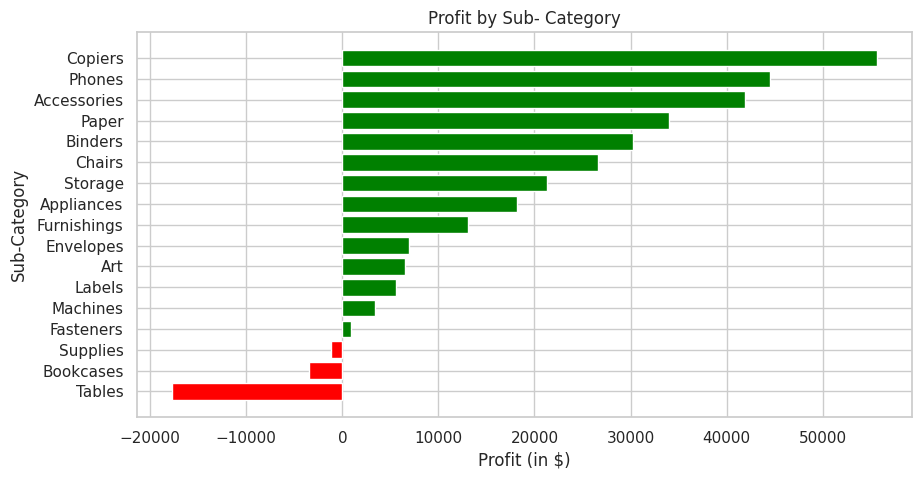

In [22]:
#Profit by sub-category (Loss Highlighted)

sub_profit = df.groupby("Sub-Category")["Profit"].sum().sort_values()

colors = ["red" if x < 0 else "green" for x in sub_profit]

plt.barh(sub_profit.index, sub_profit.values, color=colors)
plt.title("Profit by Sub- Category")
plt.xlabel("Profit (in $)")
plt.ylabel("Sub-Category")
plt.show()

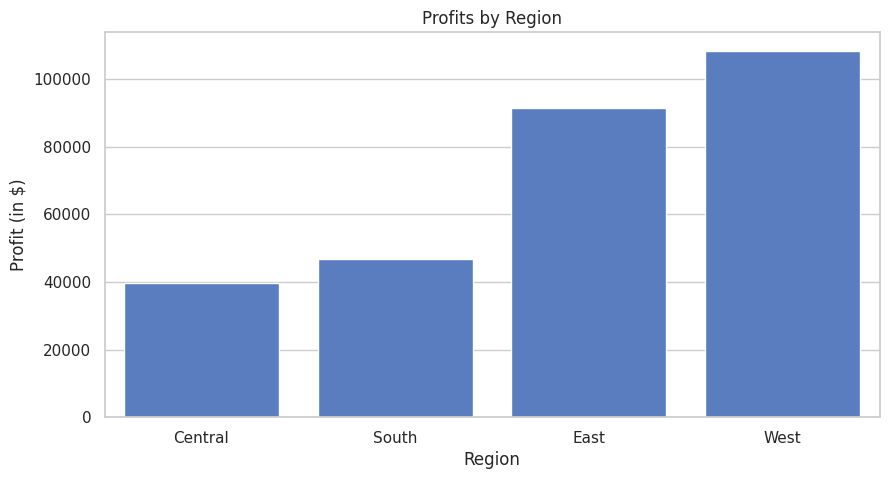

In [28]:
#key loss making sub- category
region_profit = df.groupby("Region")["Profit"].sum().sort_values()
sns.barplot(x=region_profit.index, y=region_profit.values)

plt.title("Profits by Region")
plt.xlabel("Region")
plt.ylabel("Profit (in $)")
plt.show()

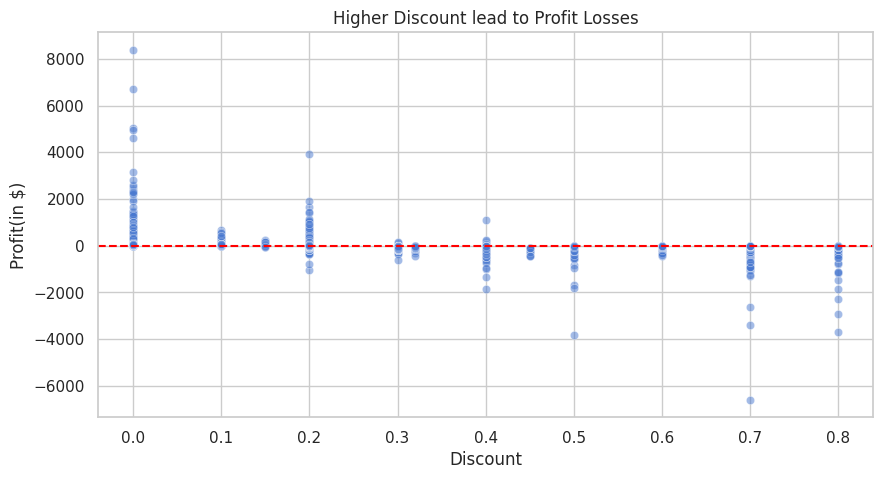

In [29]:
#Scatter plot (Discount vs Profit)

sns.scatterplot(data=df, x="Discount", y="Profit", alpha=0.5)

plt.axhline(0, color="red", linestyle="--")
plt.title("Higher Discount lead to Profit Losses")
plt.xlabel("Discount")
plt.ylabel("Profit(in $)")
plt.show()

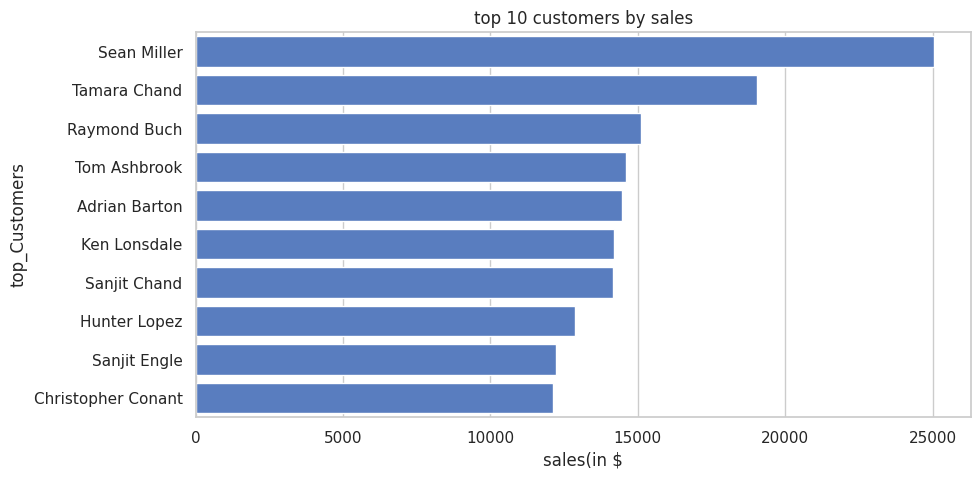

In [39]:
#Top 10 Customers by sales
top_customers= df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_customers.values, y= top_customers.index)
plt.title("top 10 customers by sales")
plt.xlabel("sales(in $")
plt.ylabel("top_Customers")
plt.show()

In [41]:
#Executive Summary Metrics
total_sales = df["Sales"].sum()
total_profit= df["Profit"].sum()
profit_margin = (total_profit / total_sales) * 100

summary =pd.DataFrame({
    "Metrics": ["Total Sales", "Total Profit", "Profit Margin (%)"],
    "Values":[total_sales, total_profit, round(profit_margin, 2)]
})

summary

,Metrics,Values
0,Total Sales,2.297201e+06
1,Total Profit,2.863970e+05
2,Profit Margin (%),1.247000e+01


In [43]:
#Final Result
print("Executive Summary")
print("-"*30)
print(f"Total Sales: {total_sales:,.0f}")
print(f"Total Profit: {total_profit:,.0f}")
print(f"Profit Margin: {profit_margin:.2f}%")

print("nKEY INSIGHTS")
print("1. Technology Category drives the highest profit")
print("2. Furniture sub-Categories incur consistent losses")
print("3. High Discounting negatively impacts profitability")
print("4. A small group of customers generates significant revenue")

Executive Summary
------------------------------
Total Sales: 2,297,201
Total Profit: 286,397
Profit Margin: 12.47%
nKEY INSIGHTS
1. Technology Category drives the highest profit
2. Furniture sub-Categories incur consistent losses
3. High Discounting negatively impacts profitability
4. A small group of customers generates significant revenue
